In [1]:
import pandas as pd
import numpy as np


In [2]:
import xlrd

# Path to the Excel workbook
excel_file = r"C:\Users\mynam\Downloads\Sample - Superstore(1) (1).xls"

# Read all sheets from the Excel file
xls = pd.ExcelFile(excel_file, engine='xlrd')

# Get the sheet names
sheet_names = xls.sheet_names

# Create a dictionary to store dataframes
dfs = {}

# Read each sheet into a separate dataframe
for sheet in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet, engine='xlrd')
    dfs[sheet] = df

In [3]:
# Access individual dataframes
orders_df = dfs['Orders']
returns_df = dfs['Returns']
People_df = dfs['People']

In [4]:
orders_df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
# Replace missing values in 'Postal Code' with '0000'
orders_df['Postal Code'] = orders_df['Postal Code'].fillna('0000')

# Verify the changes

print(orders_df['Postal Code'].isna().sum(), "missing values")

0 missing values


In [6]:
#total number of rows in the dataframe
print(len(orders_df))

distinct_combinations = orders_df.groupby(['Order ID', 'Product ID']).size().reset_index().shape[0]
print(distinct_combinations)

9994
9986


In [7]:
# Group by 'Order ID' and 'Product ID', count occurrences, and filter for counts > 1
duplicates = orders_df.groupby(['Order ID', 'Product ID']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

# Sort by count in descending order (optional, for better readability)
duplicates = duplicates.sort_values('count', ascending=False)

print("Duplicate combinations of 'Order ID' and 'Product ID':")
print(duplicates)

# Print the total number of duplicate combinations
print(f"\nTotal number of duplicate combinations: {len(duplicates)}")

Duplicate combinations of 'Order ID' and 'Product ID':
            Order ID       Product ID  count
1751  CA-2019-103135  OFF-BI-10000069      2
4343  CA-2020-129714  OFF-PA-10001970      2
4561  CA-2020-137043  FUR-FU-10003664      2
4668  CA-2020-140571  OFF-PA-10001954      2
6298  CA-2021-118017  TEC-AC-10002006      2
7677  CA-2021-152912  OFF-ST-10003208      2
8520  US-2018-150119  FUR-CH-10002965      2
9106  US-2020-123750  TEC-AC-10004659      2

Total number of duplicate combinations: 8


In [8]:
duplicates = orders_df.groupby(['Order ID', 'Product ID']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

# Now, merge this back with the original dataframe to get the desired columns
result = orders_df.merge(duplicates[['Order ID', 'Product ID']], on=['Order ID', 'Product ID'])

# Select only the columns we want
result = result[['Product ID', 'Order ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

# Sort the result (optional, for better readability)
result = result.sort_values(['Order ID', 'Product ID'])

result

,Product ID,Order ID,Sales,Quantity,Discount,Profit
10,OFF-BI-10000069,CA-2019-103135,135.090,9,0.0,62.1414
11,OFF-BI-10000069,CA-2019-103135,90.060,6,0.0,41.4276
0,OFF-PA-10001970,CA-2020-129714,24.560,2,0.0,11.5432
1,OFF-PA-10001970,CA-2020-129714,49.120,4,0.0,23.0864
4,FUR-FU-10003664,CA-2020-137043,572.760,6,0.0,166.1004
5,FUR-FU-10003664,CA-2020-137043,286.380,3,0.0,83.0502
14,OFF-PA-10001954,CA-2020-140571,319.760,14,0.0,147.0896
15,OFF-PA-10001954,CA-2020-140571,45.680,2,0.0,21.0128
12,TEC-AC-10002006,CA-2021-118017,76.752,6,0.2,10.5534
13,TEC-AC-10002006,CA-2021-118017,102.336,8,0.2,14.0712


In [9]:
#taking sum of quantity,sales,profit and max of other columns ; also droping row_id column
orders_df = orders_df.groupby(['Order ID', 'Product ID']).agg({
    'Order Date': 'max',
    'Ship Date': 'max',
    'Ship Mode': 'max',
    'Customer ID': 'max',
    'Customer Name': 'max',
    'Segment': 'max',
    'Country/Region': 'max',
    'City': 'max',
    'State': 'max',
    'Postal Code': 'max',
    'Region': 'max',
    'Category': 'max',
    'Sub-Category': 'max',
    'Product Name': 'max',
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'max',
    'Profit': 'sum'
}).reset_index()

In [10]:
orders_df


,Order ID,Product ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-100006,TEC-PH-10002075,2018-09-07,2018-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024.0,East,Technology,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113
1,CA-2018-100090,FUR-TA-10003715,2018-07-08,2018-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122.0,West,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354
2,CA-2018-100090,OFF-BI-10001597,2018-07-08,2018-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122.0,West,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704,6,0.2,68.8464
3,CA-2018-100293,OFF-PA-10000176,2018-03-14,2018-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216.0,South,Office Supplies,Paper,Xerox 1887,91.056,6,0.2,31.8696
4,CA-2018-100328,OFF-BI-10000343,2018-01-28,2018-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024.0,East,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",3.928,1,0.2,1.3257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,US-2021-169551,OFF-PA-10004100,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,Office Supplies,Paper,Xerox 216,15.552,3,0.2,5.4432
9982,US-2021-169551,OFF-ST-10004835,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,Office Supplies,Storage,Plastic Stacking Crates & Casters,13.392,3,0.2,1.0044
9983,US-2021-169551,TEC-AC-10002018,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,Technology,Accessories,AmazonBasics 3-Button USB Wired Mouse,16.776,3,0.2,4.8231
9984,US-2021-169551,TEC-AC-10003033,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,527.920,2,0.2,85.7870


In [11]:
duplicates = orders_df.groupby(['Order ID', 'Product ID']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

# Now, merge this back with the original dataframe to get the desired columns
result = orders_df.merge(duplicates[['Order ID', 'Product ID']], on=['Order ID', 'Product ID'])

# Select only the columns we want
result = result[['Product ID', 'Order ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

# Sort the result (optional, for better readability)
result = result.sort_values(['Order ID', 'Product ID'])

result

,Product ID,Order ID,Sales,Quantity,Discount,Profit


In [12]:
# NO duplicates now...!!

In [13]:
# Get distinct Order IDs from returns_df
returned_order_ids = set(returns_df['Order ID'])

# Create a dictionary mapping regions to regional managers
region_manager_dict = dict(zip(People_df['Region'], People_df['Regional Manager']))

# Create df_merge with all columns from orders_df
df_merge = orders_df.copy()

# Add 'Returned' column
df_merge['Returned'] = df_merge['Order ID'].isin(returned_order_ids)

# Add 'Regional Manager' column
df_merge['Regional Manager'] = df_merge['Region'].map(region_manager_dict)

df_merge

,Order ID,Product ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Regional Manager
0,CA-2018-100006,TEC-PH-10002075,2018-09-07,2018-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,East,Technology,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113,False,Chuck Magee
1,CA-2018-100090,FUR-TA-10003715,2018-07-08,2018-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,West,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354,False,Sadie Pawthorne
2,CA-2018-100090,OFF-BI-10001597,2018-07-08,2018-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,West,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704,6,0.2,68.8464,False,Sadie Pawthorne
3,CA-2018-100293,OFF-PA-10000176,2018-03-14,2018-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,...,South,Office Supplies,Paper,Xerox 1887,91.056,6,0.2,31.8696,False,Fred Suzuki
4,CA-2018-100328,OFF-BI-10000343,2018-01-28,2018-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,...,East,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",3.928,1,0.2,1.3257,False,Chuck Magee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,US-2021-169551,OFF-PA-10004100,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,East,Office Supplies,Paper,Xerox 216,15.552,3,0.2,5.4432,False,Chuck Magee
9982,US-2021-169551,OFF-ST-10004835,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,East,Office Supplies,Storage,Plastic Stacking Crates & Casters,13.392,3,0.2,1.0044,False,Chuck Magee
9983,US-2021-169551,TEC-AC-10002018,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,East,Technology,Accessories,AmazonBasics 3-Button USB Wired Mouse,16.776,3,0.2,4.8231,False,Chuck Magee
9984,US-2021-169551,TEC-AC-10003033,2021-07-07,2021-07-09,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,527.920,2,0.2,85.7870,False,Chuck Magee


In [14]:
# Find products with multiple names
product_name_counts = df_merge.groupby('Product ID')['Product Name'].nunique().reset_index(name='name_count')
products_with_multiple_names = product_name_counts[product_name_counts['name_count'] > 1]

# Display the results
print(products_with_multiple_names)
print(f"Number of products with multiple names: {len(products_with_multiple_names)}")


           Product ID  name_count
18    FUR-BO-10002213           2
65    FUR-CH-10001146           2
183   FUR-FU-10001473           2
284   FUR-FU-10004017           2
290   FUR-FU-10004091           2
295   FUR-FU-10004270           2
310   FUR-FU-10004848           2
311   FUR-FU-10004864           2
387   OFF-AP-10000576           2
506   OFF-AR-10001149           2
721   OFF-BI-10002026           2
831   OFF-BI-10004632           2
832   OFF-BI-10004654           2
1044  OFF-PA-10000357           2
1049  OFF-PA-10000477           2
1064  OFF-PA-10000659           2
1086  OFF-PA-10001166           2
1144  OFF-PA-10001970           2
1156  OFF-PA-10002195           2
1168  OFF-PA-10002377           2
1198  OFF-PA-10003022           2
1331  OFF-ST-10001228           2
1418  OFF-ST-10004950           2
1517  TEC-AC-10002049           2
1533  TEC-AC-10002550           2
1569  TEC-AC-10003832           2
1632  TEC-MA-10001148           2
1728  TEC-PH-10001530           2
1740  TEC-PH-1

The above observation implies that there are about 32 Product_ID s with 2 different Product Names, Which goes against one of our assumptions i.e. 1 to 1 relationship b/w Poduct name and Product ID


Checking for Product Names with multiple Product IDs is an important step in data validation. While ideally each product should have a unique identifier, real-world scenarios often present exceptions. Multiple Product IDs for the same Product Name can occur due to various reasons such as product variations, regional differences. This check helps identify such cases, allowing for proper data management and ensuring accurate analysis. By understanding these instances, we can make informed decisions on how to handle them in our data processing pipeline, whether it's consolidating entries, maintaining separate identifiers, or flagging them for further review. This process is crucial for maintaining data integrity and enabling precise inventory management and sales analysis.

Now, we can clearly Decline that there is nos uch 1 to 1 relationship nor it was originally ment to be b/w product_id and product name,
Therefore while creating Product entity we will create a new "PRODUCT_KEY_ID" column which will be a combination of "Product_ID" and "Product Name".....


In [127]:
product_name_id_counts = df_merge.groupby('Product Name')['Product ID'].nunique().reset_index(name='ID_count')
products_with_multiple_ids = product_name_id_counts[product_name_id_counts['ID_count'] > 1].sort_values('ID_count', ascending=False)

print(f"Number of Product Names with multiple Product IDs: {len(products_with_multiple_ids)}")
print("\nList of Product Names with multiple Product IDs:")
print(products_with_multiple_ids)

for product_name in products_with_multiple_ids['Product Name']:
    product_ids = df_merge[df_merge['Product Name'] == product_name]['Product ID'].unique()
    print(f"\nProduct Name: {product_name}")
    print(f"Product IDs: {product_ids}")

Number of Product Names with multiple Product IDs: 17

List of Product Names with multiple Product IDs:
                                       Product Name  ID_count
1498                                        Staples        10
1492                                Staple envelope         9
536                               Easy-staple paper         8
1499                        Staples in misc. colors         7
1495                                 Staple remover         3
1493                                  Staple holder         3
4           #10- 4 1/8" x 9 1/2" Recycled Envelopes         2
1496                     Staple-based wall hangings         2
1494                                  Staple magnet         2
1296                       Prang Drawing Pencil Set         2
259                         Avery Non-Stick Binders         2
1248  Peel & Seel Recycled Catalog Envelopes, Brown         2
1216                          Okidata C610n Printer         2
941                      KI 

In [15]:
#count of distinct order ID where returned is true
df_merge[df_merge['Returned'] == True]['Order ID'].count()




800

### Normalized form:
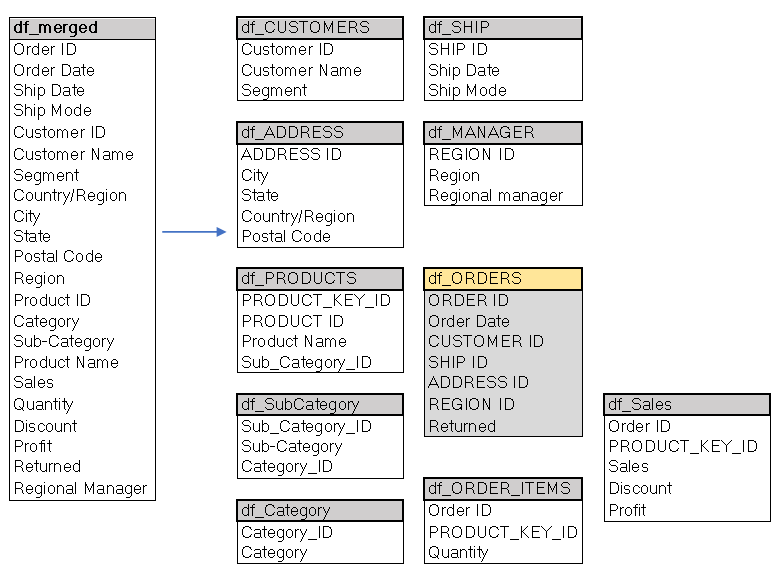

#### Converting df_merge into further normalized forms


In [16]:
import pandas as pd

# Assuming df_merge is already loaded

# df_CUSTOMERS
df_CUSTOMERS = df_merge[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates().reset_index(drop=True)

# df_ADDRESS
df_ADDRESS = df_merge[['City', 'State', 'Country/Region', 'Postal Code']].drop_duplicates().reset_index(drop=True)
df_ADDRESS['ADDRESS_ID'] = df_ADDRESS.index + 1

# df_PRODUCTS
df_PRODUCTS = df_merge[['Product ID', 'Product Name', 'Sub-Category']].drop_duplicates().reset_index(drop=True)
df_PRODUCTS['PRODUCT_KEY_ID'] = df_PRODUCTS.index + 1

# df_SubCategory
df_SubCategory = df_merge[['Sub-Category','Category']].drop_duplicates().reset_index(drop=True)
df_SubCategory['Sub_Category_ID'] = df_SubCategory.index + 1

# df_Category
df_Category = df_merge[['Category']].drop_duplicates().reset_index(drop=True)
df_Category['Category_ID'] = df_Category.index + 1

#update df_SubCategory with Category_ID
df_SubCategory = pd.merge(df_SubCategory, df_Category, on='Category')
df_SubCategory = df_SubCategory[['Sub_Category_ID','Sub-Category', 'Category_ID']]

# Update df_PRODUCTS with Sub_Category_ID
df_PRODUCTS = pd.merge(df_PRODUCTS, df_SubCategory, on='Sub-Category')
df_PRODUCTS = df_PRODUCTS[['PRODUCT_KEY_ID','Product ID', 'Product Name', 'Sub_Category_ID']]

# df_MANAGER
df_MANAGER = df_merge[['Region', 'Regional Manager']].drop_duplicates().reset_index(drop=True)
df_MANAGER['REGION_ID'] = df_MANAGER.index + 1

# df_SHIP
df_SHIP = df_merge[['Ship Date', 'Ship Mode']].drop_duplicates().reset_index(drop=True)
df_SHIP['SHIP_ID'] = df_SHIP.index + 1

# df_ORDERS
df_ORDERS = df_merge[['Order ID', 'Customer ID','Order Date','Ship Date','Ship Mode','Returned','City','State','Country/Region','Postal Code','Region']].drop_duplicates().reset_index(drop=True)
#update df_ORDERS with SHIP_ID
df_ORDERS = pd.merge(df_ORDERS, df_SHIP, on=['Ship Mode','Ship Date'])
df_ORDERS = df_ORDERS[['Order ID', 'Customer ID','Order Date','SHIP_ID','Returned','City','State','Country/Region','Postal Code','Region']]
#update df_ORDERS with Address_ID
df_ORDERS = pd.merge(df_ORDERS, df_ADDRESS, on=['City','State','Country/Region','Postal Code'])
df_ORDERS = df_ORDERS[['Order ID', 'Customer ID','Order Date','SHIP_ID','Returned','ADDRESS_ID','Region']]
#update df_ORDERS with Region_ID
df_ORDERS = pd.merge(df_ORDERS, df_MANAGER, on='Region')
df_ORDERS = df_ORDERS[['Order ID', 'Customer ID','Order Date','SHIP_ID','Returned','ADDRESS_ID','REGION_ID']]

# df_ORDER_ITEMS
df_ORDER_ITEMS = df_merge[['Order ID', 'Product ID','Product Name', 'Quantity']].drop_duplicates().reset_index(drop=True)
#Update df_ORDER_ITEMS with PRODUCT_KEY_ID
df_ORDER_ITEMS = pd.merge(df_ORDER_ITEMS, df_PRODUCTS, on=['Product ID','Product Name'])
df_ORDER_ITEMS = df_ORDER_ITEMS[['Order ID', 'PRODUCT_KEY_ID','Quantity']]

# df_Sales
df_Sales = df_merge[['Order ID', 'Product ID','Product Name', 'Sales', 'Discount', 'Profit']].drop_duplicates().reset_index(drop=True)
#Update df_Sales with PRODUCT_KEY_ID
df_Sales = pd.merge(df_Sales, df_PRODUCTS, on=['Product ID','Product Name'])
df_Sales = df_Sales[['Order ID', 'PRODUCT_KEY_ID','Sales', 'Discount', 'Profit']]


In [17]:
print("Length of df_CUSTOMERS:", len(df_CUSTOMERS))
print("Length of df_ADDRESS:", len(df_ADDRESS))
print("Length of df_PRODUCTS:", len(df_PRODUCTS))
print("Length of df_SubCategory:", len(df_SubCategory))
print("Length of df_Category:", len(df_Category))
print("Length of df_MANAGER:", len(df_MANAGER))
print("Length of df_SHIP:", len(df_SHIP))
print("Length of df_ORDERS:", len(df_ORDERS))
print("Length of df_ORDER_ITEMS:", len(df_ORDER_ITEMS))
print("Length of df_Sales:", len(df_Sales))




Length of df_CUSTOMERS: 793
Length of df_ADDRESS: 632
Length of df_PRODUCTS: 1894
Length of df_SubCategory: 17
Length of df_Category: 3
Length of df_MANAGER: 4
Length of df_SHIP: 2608
Length of df_ORDERS: 5009
Length of df_ORDER_ITEMS: 9986
Length of df_Sales: 9986


In [18]:
#get list of columns of each dataframe in order
print(df_CUSTOMERS.columns)
print(df_ADDRESS.columns)
print(df_PRODUCTS.columns)
print(df_SubCategory.columns)
print(df_Category.columns)
print(df_MANAGER.columns)
print(df_SHIP.columns)
print(df_ORDERS.columns)
print(df_ORDER_ITEMS.columns)
print(df_Sales.columns)



Index(['Customer ID', 'Customer Name', 'Segment'], dtype='object')
Index(['City', 'State', 'Country/Region', 'Postal Code', 'ADDRESS_ID'], dtype='object')
Index(['PRODUCT_KEY_ID', 'Product ID', 'Product Name', 'Sub_Category_ID'], dtype='object')
Index(['Sub_Category_ID', 'Sub-Category', 'Category_ID'], dtype='object')
Index(['Category', 'Category_ID'], dtype='object')
Index(['Region', 'Regional Manager', 'REGION_ID'], dtype='object')
Index(['Ship Date', 'Ship Mode', 'SHIP_ID'], dtype='object')
Index(['Order ID', 'Customer ID', 'Order Date', 'SHIP_ID', 'Returned',
       'ADDRESS_ID', 'REGION_ID'],
      dtype='object')
Index(['Order ID', 'PRODUCT_KEY_ID', 'Quantity'], dtype='object')
Index(['Order ID', 'PRODUCT_KEY_ID', 'Sales', 'Discount', 'Profit'], dtype='object')


In [143]:
df_ORDERS

,Order ID,Customer ID,Order Date,SHIP_ID,Returned,ADDRESS_ID,REGION_ID
0,CA-2018-100006,DK-13375,2018-09-07,1,False,1,1
1,CA-2018-100090,EB-13705,2018-07-08,2,False,2,2
2,CA-2018-100293,NF-18475,2018-03-14,3,False,3,3
3,CA-2018-100328,JC-15340,2018-01-28,4,False,1,1
4,CA-2018-100363,JM-15655,2018-04-08,5,False,4,2
...,...,...,...,...,...,...,...
5004,US-2021-168802,JO-15145,2021-11-03,1681,False,18,2
5005,US-2021-169320,LH-16900,2021-07-23,1955,False,632,4
5006,US-2021-169488,AA-10375,2021-09-07,2217,False,202,1
5007,US-2021-169502,MG-17650,2021-08-28,2074,False,176,4


In [23]:
# Rearranging DataFrames using simplified assignment
df_CUSTOMERS1 = df_CUSTOMERS[['Customer ID', 'Customer Name', 'Segment']]
df_ADDRESS1 = df_ADDRESS[['ADDRESS_ID', 'City', 'State', 'Country/Region', 'Postal Code']]
df_PRODUCTS1 = df_PRODUCTS[['PRODUCT_KEY_ID','Product ID', 'Product Name', 'Sub_Category_ID']]
df_SubCategory1 = df_SubCategory[['Sub_Category_ID', 'Sub-Category', 'Category_ID']]
df_Category1 = df_Category[['Category_ID', 'Category']]
df_MANAGER1 = df_MANAGER[['REGION_ID', 'Region', 'Regional Manager']]
df_SHIP1 = df_SHIP[['SHIP_ID', 'Ship Date', 'Ship Mode']]
df_ORDERS1 = df_ORDERS[['Order ID', 'Order Date','Customer ID', 'SHIP_ID', 'Returned', 'ADDRESS_ID', 'REGION_ID']]
df_ORDER_ITEMS1 = df_ORDER_ITEMS[['Order ID', 'PRODUCT_KEY_ID','Quantity']]
df_Sales1 = df_Sales[['Order ID', 'PRODUCT_KEY_ID','Sales', 'Discount', 'Profit']]


In [29]:
df_ORDERS1.head()

,Order ID,Order Date,Customer ID,SHIP_ID,Returned,ADDRESS_ID,REGION_ID
0,CA-2018-100006,2018-09-07,DK-13375,1,False,1,1
1,CA-2018-100090,2018-07-08,EB-13705,2,False,2,2
2,CA-2018-100293,2018-03-14,NF-18475,3,False,3,3
3,CA-2018-100328,2018-01-28,JC-15340,4,False,1,1
4,CA-2018-100363,2018-04-08,JM-15655,5,False,4,2


In [38]:
#converting True to 1 and False to 0 in order to make MYSQL compatible
df_ORDERS1 = df_ORDERS1.copy()
df_ORDERS1['Returned'] = df_ORDERS1['Returned'].astype(int)

In [39]:
df_ORDERS1.head()


,Order ID,Order Date,Customer ID,SHIP_ID,Returned,ADDRESS_ID,REGION_ID
0,CA-2018-100006,2018-09-07,DK-13375,1,0,1,1
1,CA-2018-100090,2018-07-08,EB-13705,2,0,2,2
2,CA-2018-100293,2018-03-14,NF-18475,3,0,3,3
3,CA-2018-100328,2018-01-28,JC-15340,4,0,1,1
4,CA-2018-100363,2018-04-08,JM-15655,5,0,4,2


In [40]:
#distinct values with count in Returned column

print(df_ORDERS1['Returned'].value_counts())



Returned
0    4713
1     296
Name: count, dtype: int64


In [41]:
#saving each dataframe into csv files
df_CUSTOMERS1.to_csv('CUSTOMERS.csv', index=False)
df_ADDRESS1.to_csv('ADDRESS.csv', index=False)
df_PRODUCTS1.to_csv('PRODUCTS.csv', index=False)
df_SubCategory1.to_csv('SubCategory.csv', index=False)
df_Category1.to_csv('Category.csv', index=False)
df_MANAGER1.to_csv('MANAGER.csv', index=False)
df_SHIP1.to_csv('SHIP.csv', index=False)
df_ORDERS1.to_csv('ORDERS.csv', index=False)
df_ORDER_ITEMS1.to_csv('ORDER_ITEMS.csv', index=False)
df_Sales1.to_csv('Sales.csv', index=False)




##### Creating New DATABASE inside MYSQL - create DATABASE GBC_Superstore ;


In [47]:
import mysql.connector

# Establish a connection to the MySQL server
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='GBC_Superstore'
)

print("Connected to MySQL") if connection.is_connected() else print("Connection failed")


Connected to MySQL


In [48]:
import mysql.connector

# Establish the MySQL connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='GBC_Superstore'
)

cursor = connection.cursor()

# Create the tables
cursor.execute("""
    CREATE TABLE CUSTOMERS (
        Customer_ID VARCHAR(50) PRIMARY KEY,
        Customer_Name VARCHAR(100),
        Segment VARCHAR(50)
    );
""")

cursor.execute("""
    CREATE TABLE ADDRESS (
        Address_ID INT PRIMARY KEY,
        City VARCHAR(100),
        State VARCHAR(100),
        Country_Region VARCHAR(100),
        Postal_Code VARCHAR(20)
    );
""")

cursor.execute("""
    CREATE TABLE Category (
        Category_ID INT PRIMARY KEY,
        Category VARCHAR(100)
    );
""")

cursor.execute("""
    CREATE TABLE SubCategory (
        Sub_Category_ID INT PRIMARY KEY,
        Sub_Category VARCHAR(100),
        Category_ID INT,
        FOREIGN KEY (Category_ID) REFERENCES Category(Category_ID)
    );
""")


cursor.execute("""
    CREATE TABLE PRODUCTS (
        Product_KEY_ID INT PRIMARY KEY,
        Product_ID VARCHAR(50),
        Product_Name VARCHAR(10000),
        Sub_Category_ID INT,
        FOREIGN KEY (Sub_Category_ID) REFERENCES SubCategory(Sub_Category_ID)
    );
""")

cursor.execute("""
    CREATE TABLE MANAGER (
        Region_ID INT PRIMARY KEY,
        Region VARCHAR(100),
        Regional_Manager VARCHAR(100)
    );
""")

cursor.execute("""
    CREATE TABLE SHIP (
        Ship_ID INT PRIMARY KEY,
        Ship_Date DATE,
        Ship_Mode VARCHAR(50)
    );
""")

cursor.execute("""
    CREATE TABLE ORDERS (
        Order_ID VARCHAR(50) PRIMARY KEY,
        Order_Date DATE,
        Customer_ID VARCHAR(50),
        Ship_ID INT,
        Returned BOOLEAN,       
        Address_ID INT,
        Region_ID INT,
        FOREIGN KEY (Customer_ID) REFERENCES CUSTOMERS(Customer_ID),
        FOREIGN KEY (Ship_ID) REFERENCES SHIP(Ship_ID),
        FOREIGN KEY (Address_ID) REFERENCES ADDRESS(Address_ID),
        FOREIGN KEY (Region_ID) REFERENCES MANAGER(Region_ID)
    );
""")

cursor.execute("""
    CREATE TABLE ORDER_ITEMS (
        Order_ID VARCHAR(50),
        Product_KEY_ID INT,
        Quantity INT,
        PRIMARY KEY (Order_ID, Product_KEY_ID),
        FOREIGN KEY (Order_ID) REFERENCES ORDERS(Order_ID),
        FOREIGN KEY (Product_KEY_ID) REFERENCES PRODUCTS(Product_KEY_ID)
    );
""")

cursor.execute("""
    CREATE TABLE Sales (
        Order_ID VARCHAR(50),
        Product_KEY_ID INT,
        Sales DOUBLE,
        Discount DOUBLE,
        Profit DOUBLE,
        PRIMARY KEY (Order_ID, Product_KEY_ID),
        FOREIGN KEY (Order_ID) REFERENCES ORDERS(Order_ID),
        FOREIGN KEY (Product_KEY_ID) REFERENCES PRODUCTS(Product_KEY_ID)
    );
""")

# Commit the transaction
connection.commit()

print("Tables created successfully!")

# Close the connection
cursor.close()
connection.close()


Tables created successfully!


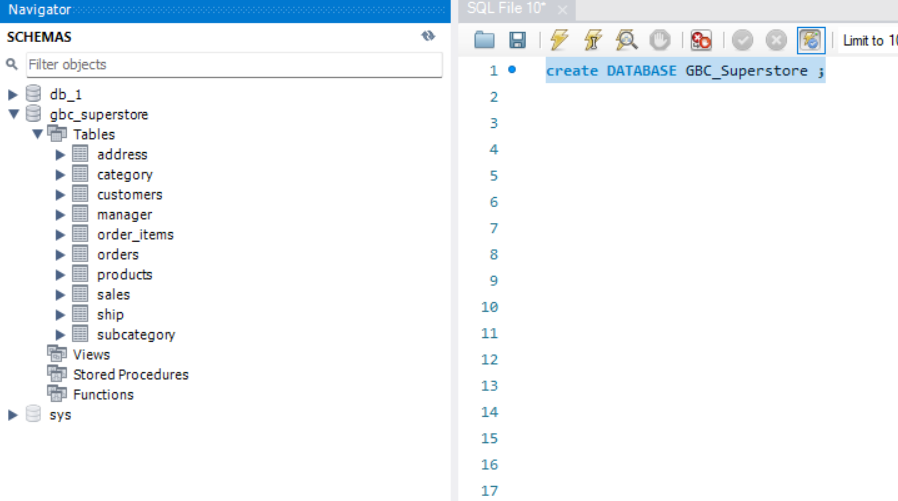

 Loading Data From CSV Files into MYSQL


In [49]:
import mysql.connector

# Establish MySQL connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='GBC_Superstore'
)

cursor = connection.cursor()

# List of CSV files and their corresponding table names
csv_files = [
    "ADDRESS.csv",
    "CUSTOMERS.csv",
    "Category.csv",
    "SubCategory.csv",
    "PRODUCTS.csv",
    "MANAGER.csv",
    "SHIP.csv",
    "Orders.csv",
    "Sales.csv",
    "ORDER_ITEMS.csv"  
]

# Directory for the CSV files
csv_directory = 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/'

# Loop through each file and load data into the corresponding table
for csv_file in csv_files:
    table_name = csv_file.split('.')[0].lower()  # Convert file name to lowercase table name
    csv_file_path = csv_directory + csv_file  # Full path to the CSV file
    
    # SQL command to load CSV data into the table
    query = f"""
        LOAD DATA INFILE '{csv_file_path}'
        INTO TABLE {table_name}
        FIELDS TERMINATED BY ',' 
        ENCLOSED BY '"'
        LINES TERMINATED BY '\n'
        IGNORE 1 ROWS;
    """

    try:
        # Execute the SQL command
        cursor.execute(query)
        connection.commit()
        
        # Get the number of rows inserted
        rows_inserted = cursor.rowcount
        
        print(f"{rows_inserted} rows inserted in {table_name}.")
        
    except mysql.connector.Error as err:
        print(f"Error inserting data into {table_name}: {err}")

# Close the cursor and connection
cursor.close()
connection.close()


632 rows inserted in address.
793 rows inserted in customers.
3 rows inserted in category.
17 rows inserted in subcategory.
1894 rows inserted in products.
4 rows inserted in manager.
2608 rows inserted in ship.
5009 rows inserted in orders.
9986 rows inserted in sales.
9986 rows inserted in order_items.


### Confirming the data in MYSQL by Reverse Engineering

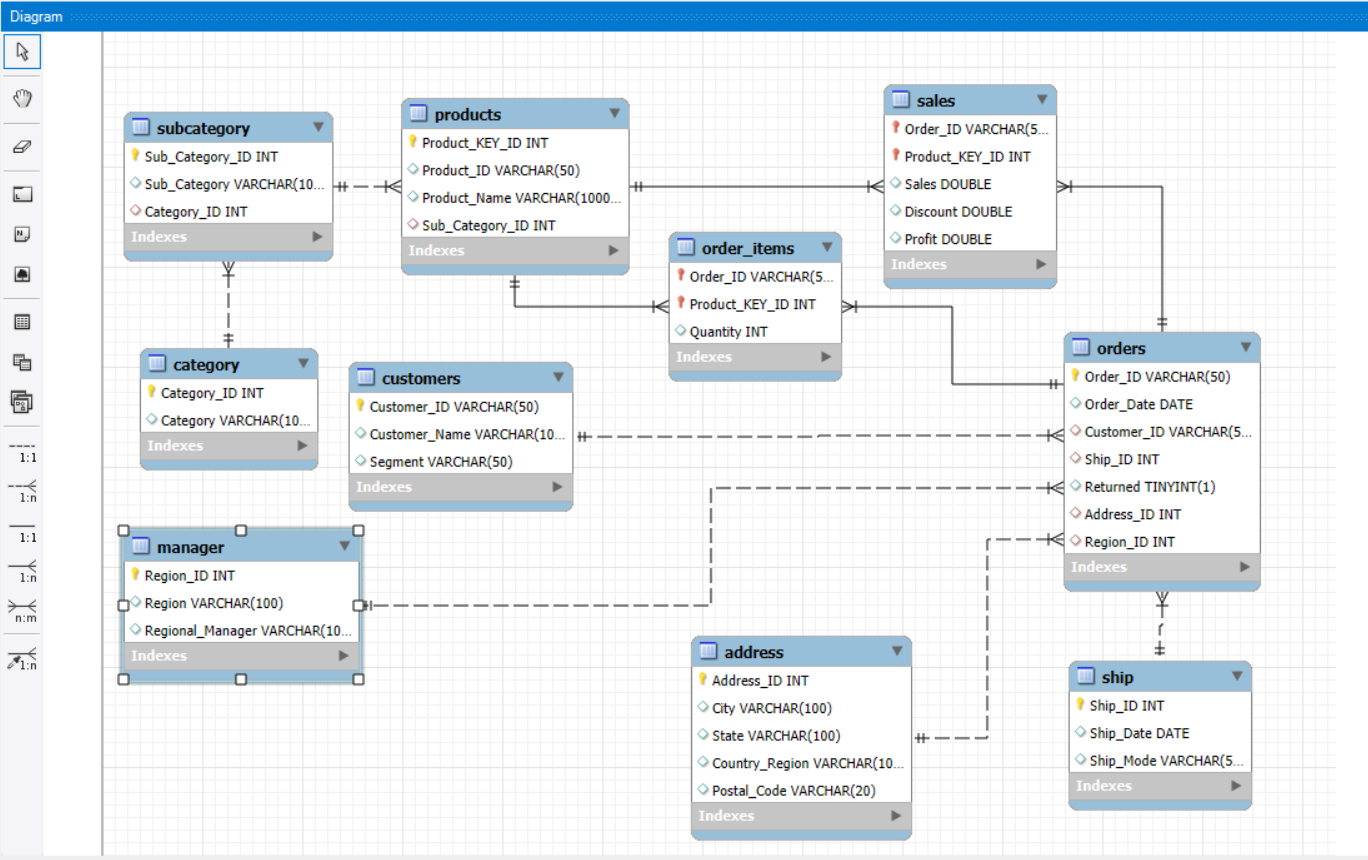


### Again Forming the main base table to be used for operational,KPI and Executive Reports

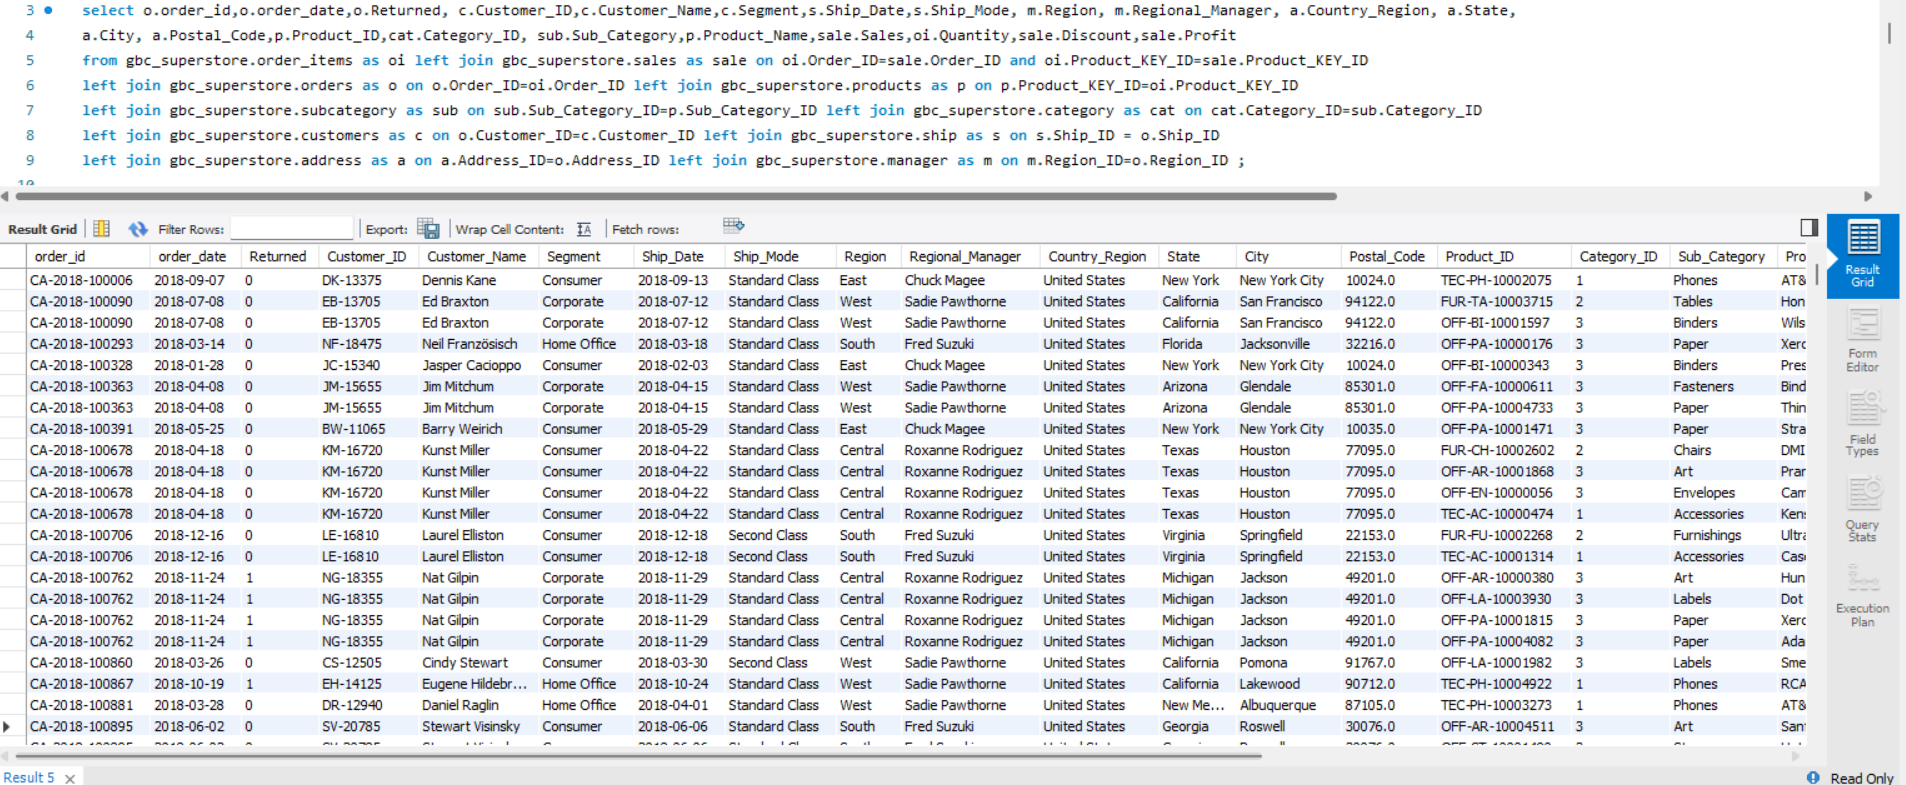


In [50]:

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='GBC_Superstore'
)


query = """
select o.order_id,o.order_date,o.Returned, c.Customer_ID,c.Customer_Name,c.Segment,s.Ship_Date,s.Ship_Mode, 
       m.Region, m.Regional_Manager, a.Country_Region, a.State, a.City, a.Postal_Code,p.Product_ID,
       cat.Category_ID, sub.Sub_Category,p.Product_Name,sale.Sales,oi.Quantity,sale.Discount,sale.Profit
from gbc_superstore.order_items as oi 
left join gbc_superstore.sales as sale on oi.Order_ID=sale.Order_ID and oi.Product_KEY_ID=sale.Product_KEY_ID
left join gbc_superstore.orders as o on o.Order_ID=oi.Order_ID 
left join gbc_superstore.products as p on p.Product_KEY_ID=oi.Product_KEY_ID
left join gbc_superstore.subcategory as sub on sub.Sub_Category_ID=p.Sub_Category_ID 
left join gbc_superstore.category as cat on cat.Category_ID=sub.Category_ID
left join gbc_superstore.customers as c on o.Customer_ID=c.Customer_ID 
left join gbc_superstore.ship as s on s.Ship_ID = o.Ship_ID
left join gbc_superstore.address as a on a.Address_ID=o.Address_ID 
left join gbc_superstore.manager as m on m.Region_ID=o.Region_ID ;
"""


df_base = pd.read_sql(query, connection)

connection.close()

print(df_base.head()) 


C:\Users\mynam\AppData\Local\Temp\ipykernel_36452\4104554234.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_base = pd.read_sql(query, connection)


         order_id  order_date  Returned Customer_ID     Customer_Name  \
0  CA-2018-100006  2018-09-07         0    DK-13375       Dennis Kane   
1  CA-2018-100090  2018-07-08         0    EB-13705        Ed Braxton   
2  CA-2018-100090  2018-07-08         0    EB-13705        Ed Braxton   
3  CA-2018-100293  2018-03-14         0    NF-18475  Neil Französisch   
4  CA-2018-100328  2018-01-28         0    JC-15340   Jasper Cacioppo   

         Segment   Ship_Date         Ship_Mode Region   Regional_Manager  ...  \
0     Consumer\r  2018-09-13  Standard Class\r   East      Chuck Magee\r  ...   
1    Corporate\r  2018-07-12  Standard Class\r   West  Sadie Pawthorne\r  ...   
2    Corporate\r  2018-07-12  Standard Class\r   West  Sadie Pawthorne\r  ...   
3  Home Office\r  2018-03-18  Standard Class\r  South      Fred Suzuki\r  ...   
4     Consumer\r  2018-02-03  Standard Class\r   East      Chuck Magee\r  ...   

            City Postal_Code       Product_ID Category_ID Sub_Category  \


In [51]:
df_base


,order_id,order_date,Returned,Customer_ID,Customer_Name,Segment,Ship_Date,Ship_Mode,Region,Regional_Manager,...,City,Postal_Code,Product_ID,Category_ID,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2018-100006,2018-09-07,0,DK-13375,Dennis Kane,Consumer\r,2018-09-13,Standard Class\r,East,Chuck Magee\r,...,New York City,10024.0\r,TEC-PH-10002075,1,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113
1,CA-2018-100090,2018-07-08,0,EB-13705,Ed Braxton,Corporate\r,2018-07-12,Standard Class\r,West,Sadie Pawthorne\r,...,San Francisco,94122.0\r,FUR-TA-10003715,2,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354
2,CA-2018-100090,2018-07-08,0,EB-13705,Ed Braxton,Corporate\r,2018-07-12,Standard Class\r,West,Sadie Pawthorne\r,...,San Francisco,94122.0\r,OFF-BI-10001597,3,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704,6,0.2,68.8464
3,CA-2018-100293,2018-03-14,0,NF-18475,Neil Französisch,Home Office\r,2018-03-18,Standard Class\r,South,Fred Suzuki\r,...,Jacksonville,32216.0\r,OFF-PA-10000176,3,Paper,Xerox 1887,91.056,6,0.2,31.8696
4,CA-2018-100328,2018-01-28,0,JC-15340,Jasper Cacioppo,Consumer\r,2018-02-03,Standard Class\r,East,Chuck Magee\r,...,New York City,10024.0\r,OFF-BI-10000343,3,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",3.928,1,0.2,1.3257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,US-2021-169551,2021-07-07,0,RL-19615,Rob Lucas,Consumer\r,2021-07-09,First Class\r,East,Chuck Magee\r,...,Philadelphia,19120.0\r,OFF-PA-10004100,3,Paper,Xerox 216,15.552,3,0.2,5.4432
9982,US-2021-169551,2021-07-07,0,RL-19615,Rob Lucas,Consumer\r,2021-07-09,First Class\r,East,Chuck Magee\r,...,Philadelphia,19120.0\r,FUR-BO-10001519,2,Bookcases,O'Sullivan 3-Shelf Heavy-Duty Bookcases,87.210,3,0.5,-45.3492
9983,US-2021-169551,2021-07-07,0,RL-19615,Rob Lucas,Consumer\r,2021-07-09,First Class\r,East,Chuck Magee\r,...,Philadelphia,19120.0\r,TEC-AC-10002018,1,Accessories,AmazonBasics 3-Button USB Wired Mouse,16.776,3,0.2,4.8231
9984,US-2021-169551,2021-07-07,0,RL-19615,Rob Lucas,Consumer\r,2021-07-09,First Class\r,East,Chuck Magee\r,...,Philadelphia,19120.0\r,TEC-AC-10003033,1,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,527.920,2,0.2,85.7870
